## Understanding and Reading the data

In [631]:
# Import important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [632]:
# read the data from CSV file
df = pd.read_csv('day.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [633]:
df.shape

(730, 16)

In [634]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [635]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [636]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [637]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [638]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning the Data

In [639]:
# dropping the unwanted columns

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [640]:
# Defining the season map function
def mapping_season_col(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Defining the weather map function
def mapping_weathersit_col(x):
    return x.map({1:"Clear", 2:"Mist", 3:"Light_snow_rain", 4:"Heavy_snow_rain"})

# Defining the month map function
def mapping_month_col(x):
    return x.map({1:"Jan", 
                  2:"Feb", 
                  3:"Mar", 
                  4:"Apr",
                  5:"May",
                  6:"June",
                  7:"Jul",
                  8:"Aug",
                  9:"Sep",
                  10:"Oct",
                  11:"Nov",
                  12:"Dec"})

# Defining the weekday map function
def mapping_weekday_col(x):
    return x.map({0:"Monday", 
                  1:"Tuesday", 
                  2:"Wednesday", 
                  3:"Thursday",
                  4:"Friday",
                  5:"Saturday",
                  6:"Sunday"})

# Applying the function to the season column
df[["season"]] = df[["season"]].apply(mapping_season_col)

# Applying the function to the weathersit column
df[["weathersit"]] = df[["weathersit"]].apply(mapping_weathersit_col)

# Applying the function to the month column
df[["month"]] = df[["month"]].apply(mapping_month_col)

# Applying the function to the weekday column
df[["weekday"]] = df[["weekday"]].apply(mapping_weekday_col)

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the Data

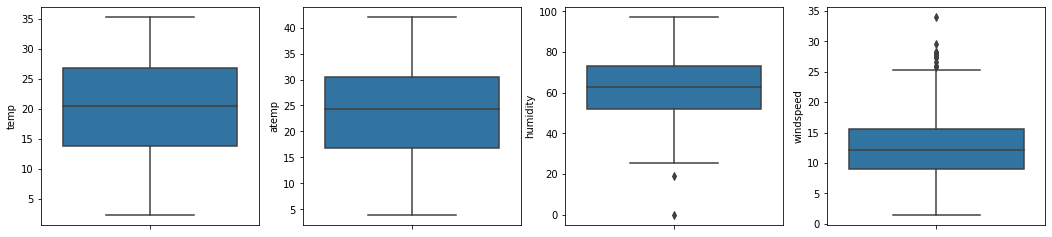

In [641]:
# Draw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

As per the above plots we can say that there are no outliers to handle

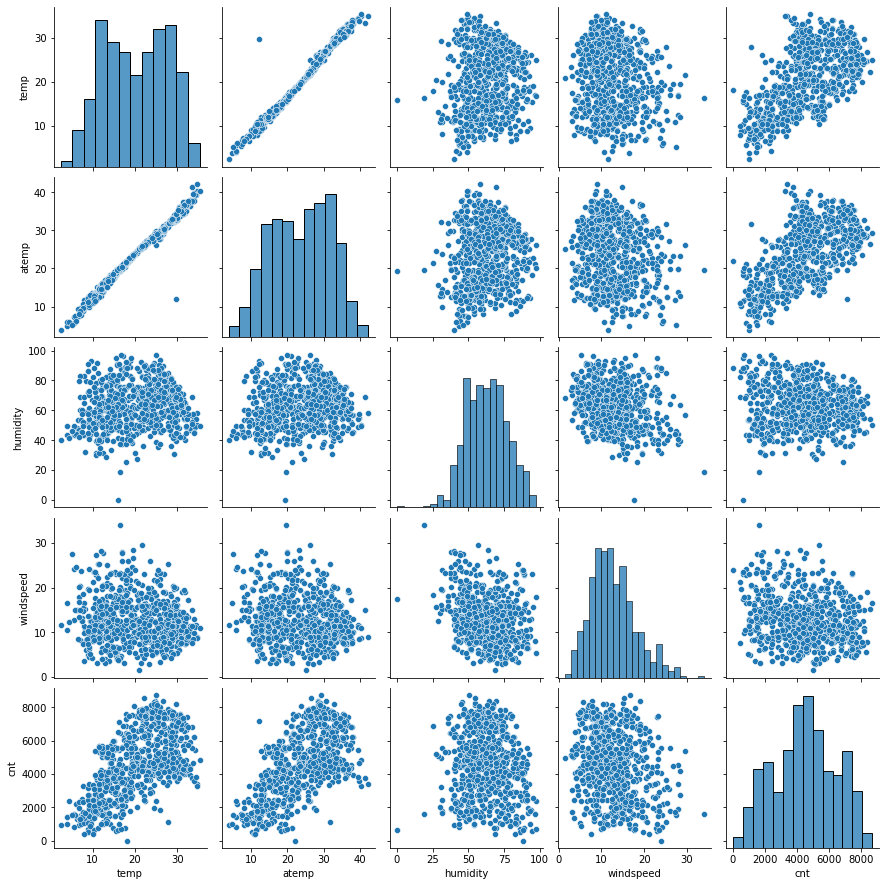

In [642]:
#Let's make a pairplot of all the numeric variables

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

As per the above plots, we can say that temp and atemp has highest correlation with the target variable 'cnt'. And it is also observed that temp and atemp are highly correlated with each other.

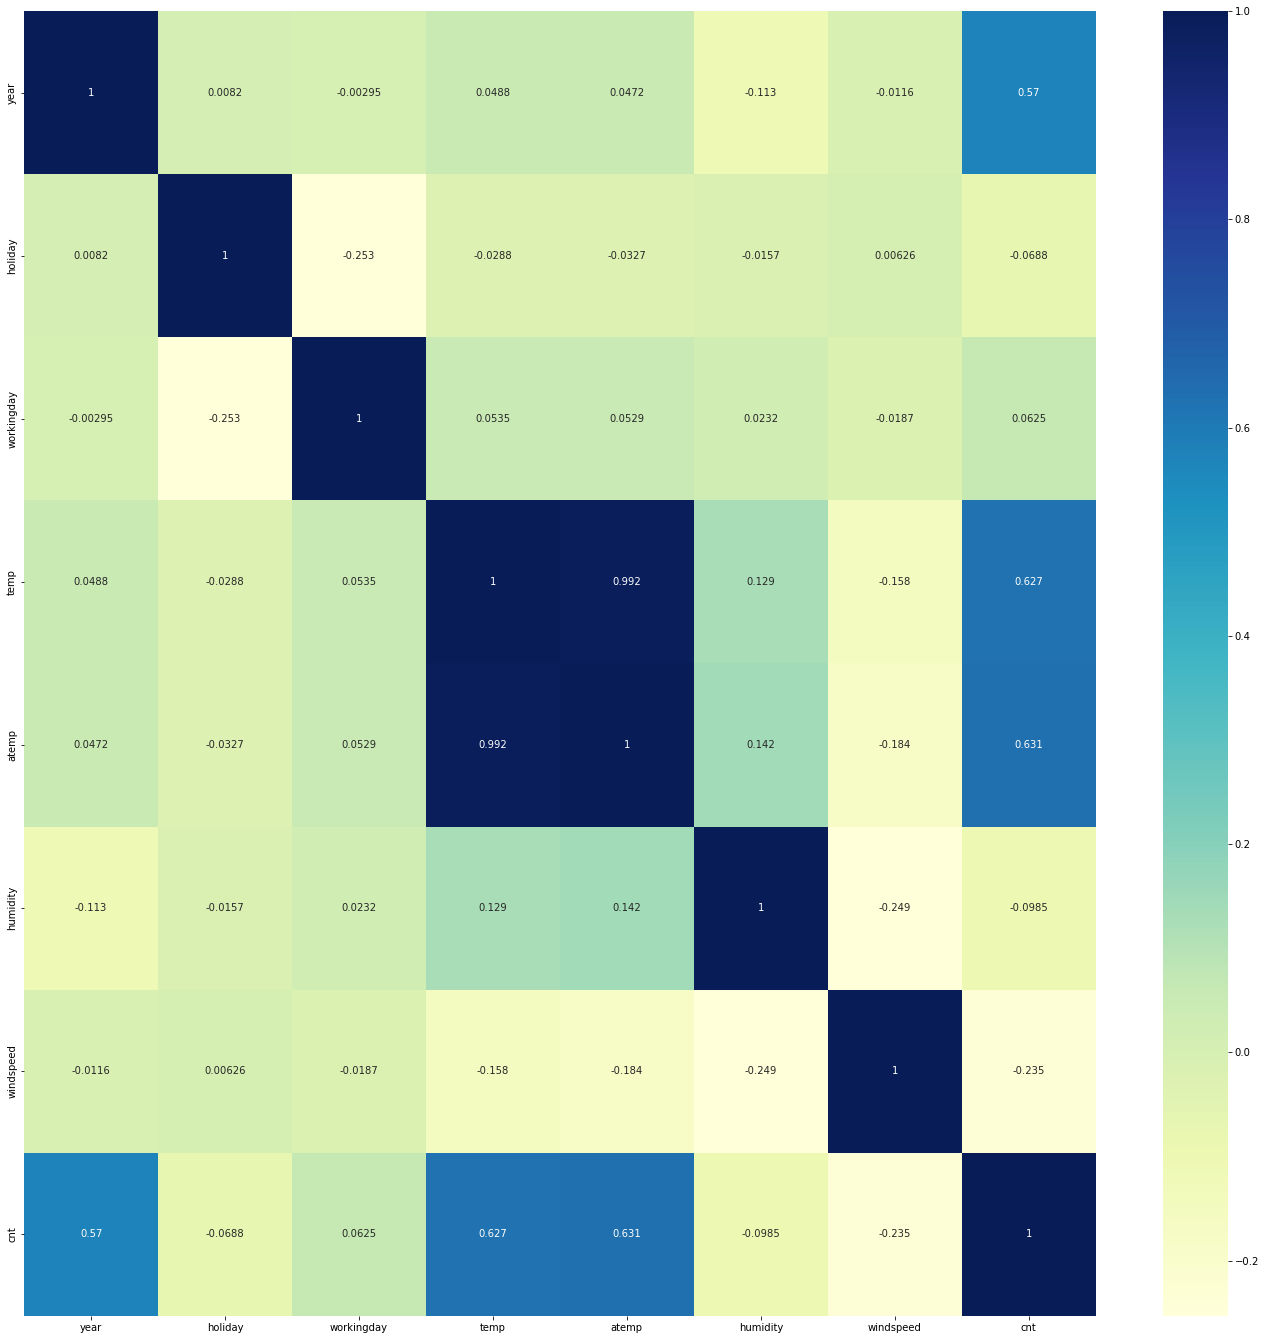

In [643]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 24))
sns.heatmap(df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

As per the above plot, atemp is having highest correlation coefficient with cnt followed by temp.

In [644]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising Categorical Variables

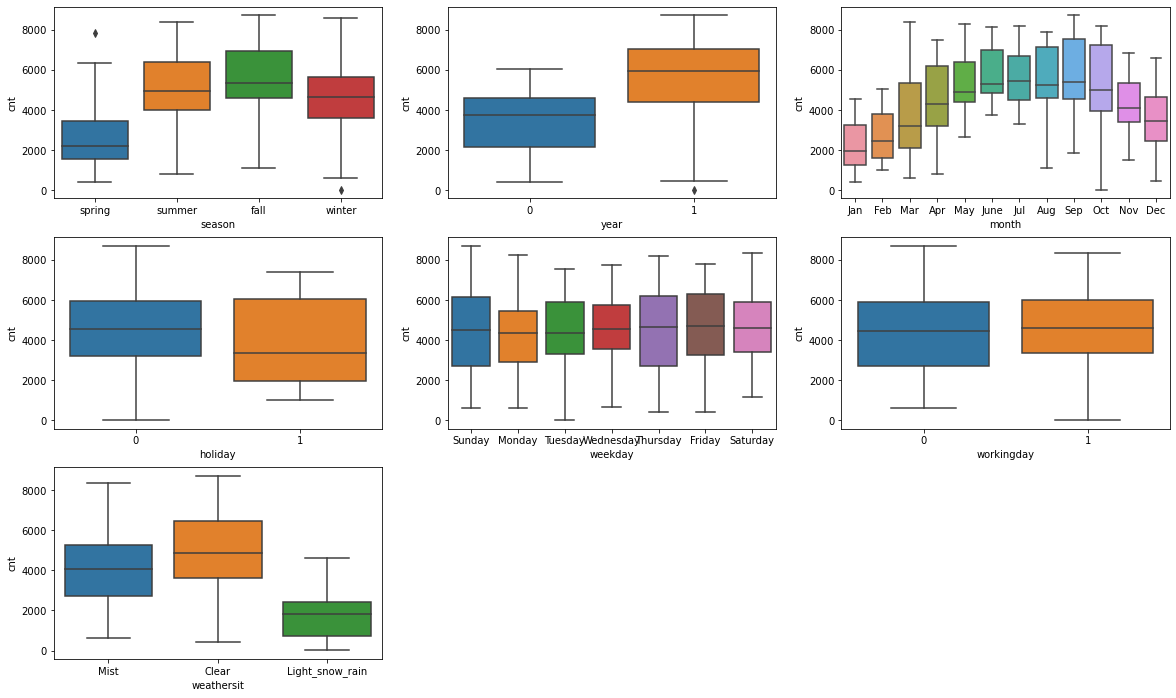

In [645]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Few observations from above heat map:
1. Season: Fall has highest demand for rental bikes
2. Every month the demand for rental bike is increasing till June. September has the highest number of demand then it is decreasing.
3. During weekdays and workingdays demands don't have that much of variation.
4. Clear weathersit has highest demand
5. When there is a holiday, demand has decreased.
6. I see that demand for next year has grown.

### Creating Dummy Variables

In [646]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [647]:
# Get the dummy variables for the feature 'weekday','season','weathersit','month' and store to their respective new variable
season_var = pd.get_dummies(df["season"], drop_first = True)
weathersit_var = pd.get_dummies(df["weathersit"],drop_first = True)
month_var = pd.get_dummies(df["month"],drop_first = True)
weekday_var = pd.get_dummies(df["weekday"],drop_first = True)

In [648]:
# Add the results to the original dataframe
df = pd.concat([df, season_var, weathersit_var, month_var, weekday_var], axis = 1)

In [649]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Sunday,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,Jan,0,Monday,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,Jan,0,Tuesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,Jan,0,Wednesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,Jan,0,Thursday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [650]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light_snow_rain', 'Mist', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [651]:
drop_these_columns_2 = ["season",
                        "weathersit",
                        "month",
                        "weekday"]
df.drop(drop_these_columns_2, inplace=True, axis=1)
df.shape

(730, 30)

In [652]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


### Model building

#### Split the Data into Training and Testing Sets

In [653]:
# splitting the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [654]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,1,0,0,0


In [655]:
# checking the shape of train dataset
df_train.shape

(510, 30)

In [656]:
# checking the shape of test dataset
df_test.shape

(219, 30)

In [657]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [658]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variable

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [659]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0


In [660]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


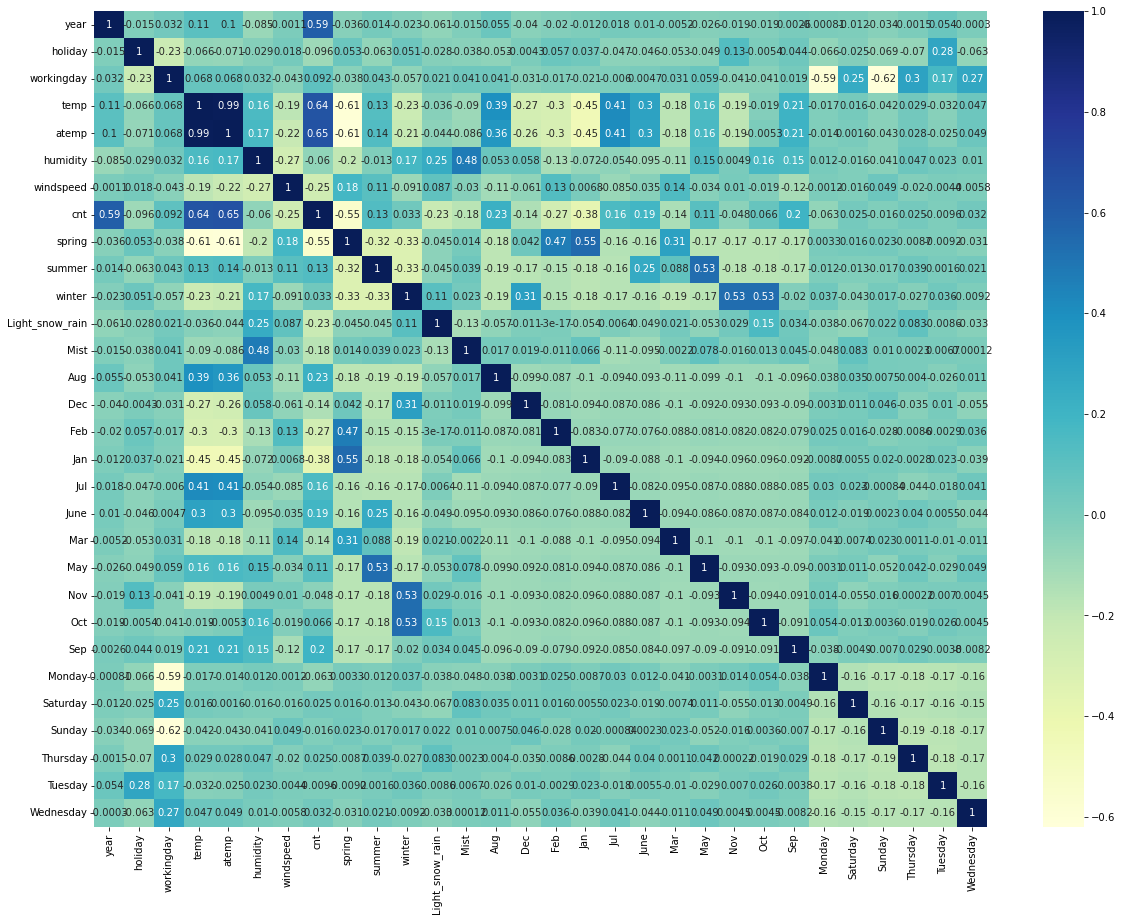

In [661]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From this we can say that, year,atemp and temp seems correlated with cnt the most. Winter is correlated with Nov and Oct month. Summer season is correlated with May month

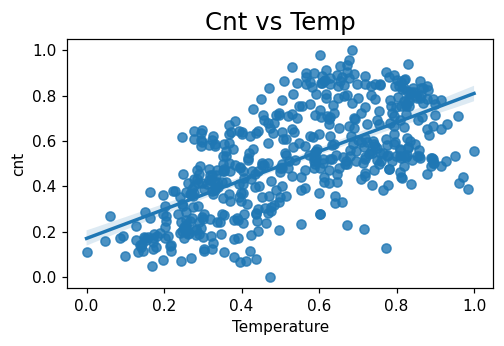

In [662]:
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

From above visualization we can say that cnt and temp are having positive correlation.

### Dividing into X and Y sets for the model building

In [663]:
y_train = df_train.pop('cnt')
X_train = df_train

In [664]:
# RFE - Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [665]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_snow_rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10)]

In [666]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light_snow_rain', 'Mist', 'Jul', 'Sep',
       'Monday', 'Sunday'],
      dtype='object')


In [667]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [668]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [669]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [670]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
14,Sunday,12.20
13,Monday,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.61
4,humidity,1.91
10,Mist,1.57


In [671]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-191
Time:                        20:58:09   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

In [672]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,humidity,28.28
2,temp,16.06
4,windspeed,4.68
5,spring,4.03
7,winter,3.37
6,summer,2.78
9,Mist,2.30
0,year,2.08
10,Jul,1.59
11,Sep,1.39


In [673]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-191
Time:                        20:58:09   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2826      0.034     

In [674]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
5,summer,2.23
4,spring,2.13
0,year,2.07
6,winter,1.84
9,Jul,1.59
8,Mist,1.55
10,Sep,1.34
12,Sunday,1.23


In [675]:
# Building 2nd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          5.73e-189
Time:                        20:58:52   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2039      0.029     

In [676]:
# We can drop Sunday variable as it has high p-value
X_train_new = X_train_new.drop(['Sunday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
5,summer,2.22
4,spring,2.11
0,year,2.07
6,winter,1.82
9,Jul,1.59
8,Mist,1.55
10,Sep,1.34
11,Monday,1.18


In [677]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.45e-190
Time:                        21:00:36   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2063      0.029     

In [679]:
# We can drop month_july variable as it has high p-value
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,3.91
0,year,2.07
4,spring,2.02
5,summer,1.90
6,winter,1.66
8,Mist,1.55
9,Sep,1.23
10,Monday,1.18
7,Light_snow_rain,1.08


In [680]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.51e-189
Time:                        21:02:12   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1983      0.029     

In [681]:
# We can drop season_spring variable as it has high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
4,summer,1.56
7,Mist,1.48
5,winter,1.39
8,Sep,1.21
9,Monday,1.16
6,Light_snow_rain,1.08
1,holiday,1.04


In [682]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.88e-189
Time:                        21:03:00   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1350      0.017     

#### Now as you can see, the VIFs and p-values both are within an acceptable range. Model 6 is our final model.

#### R-Squared value 0.837 and adjusted R-Squared value is  0.834.

#### All VIFs are now below 5.

#### All p-values are below 0.05

In [683]:
# Checking the parameters and their coefficient values
lr_6.params

const              0.134956
year               0.232661
holiday           -0.107197
temp               0.547141
windspeed         -0.153106
summer             0.086611
winter             0.132288
Light_snow_rain   -0.289246
Mist              -0.081871
Sep                0.099241
Monday            -0.049981
dtype: float64

In [685]:
y_train_pred = lr_6.predict(X_train_lm_6)

### Normality of error terms

Text(0.5, 0, 'Errors')

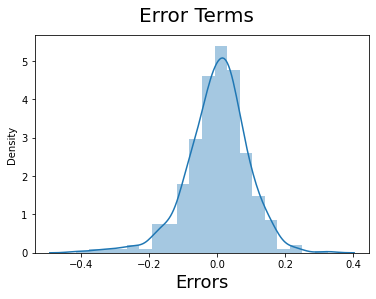

In [686]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

From above plot we can say that Error terms are normally distributed

In [687]:
# Multicollinearity Check

calculateVIF(X_train_new)

,Features,VIF
2,temp,3.72
3,windspeed,3.08
0,year,2.00
4,summer,1.56
7,Mist,1.48
5,winter,1.39
8,Sep,1.21
9,Monday,1.16
6,Light_snow_rain,1.08
1,holiday,1.04


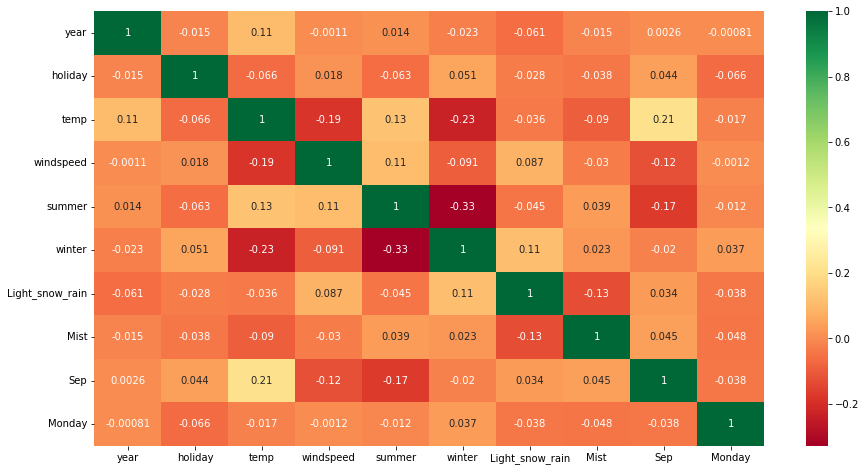

In [688]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

From above heatmap, we can observe that there is no multicollinearity.

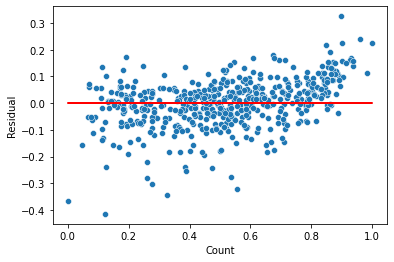

In [689]:
# Homoscedasticity Check

y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

From the abpve plot we can see that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

### Making Predictions

In [690]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,0,0


In [691]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [692]:
y_test = df_test.pop('cnt')
X_test = df_test

In [696]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [697]:
# Making predictions
y_pred = lr_6.predict(X_test_lm_6)

### Model Evaluation

Text(0, 0.5, 'y_pred')

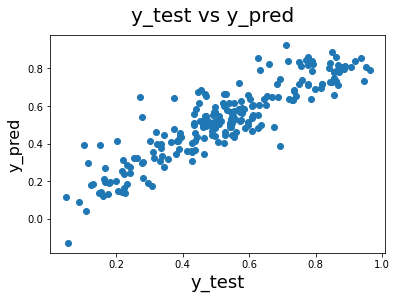

In [699]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [700]:
round(lr_6.params,4)

const              0.1350
year               0.2327
holiday           -0.1072
temp               0.5471
windspeed         -0.1531
summer             0.0866
winter             0.1323
Light_snow_rain   -0.2892
Mist              -0.0819
Sep                0.0992
Monday            -0.0500
dtype: float64

### Looking at the RMSE

In [701]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09847513150965664

In [703]:
R2 = r2_score(y_test, y_pred)
round(R2,4)

0.7958

In [704]:
# Calculating Adjusted-R^2 value for the test dataset
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
round(adj_R2,4)

0.7839

#### So final r2_score (R-Squared) for test set is 0.7958.
#### And Adjusted R-Squared value for test set is 0.7839

In [707]:
round(lr_6.params,4)

const              0.1350
year               0.2327
holiday           -0.1072
temp               0.5471
windspeed         -0.1531
summer             0.0866
winter             0.1323
Light_snow_rain   -0.2892
Mist              -0.0819
Sep                0.0992
Monday            -0.0500
dtype: float64

We can see that the equation of our best fitted line is:

##### cnt = 0.1350 + 0.2327 year - 0.1072 temp + 0.5471 temp - 0.1531 windspeed + 0.0866 summer + 0.1323 winter - 0.2892 Light_snow_rain - 0.0819 weathersit_Mist +  0.0992 Sep - 0.0500 Monday

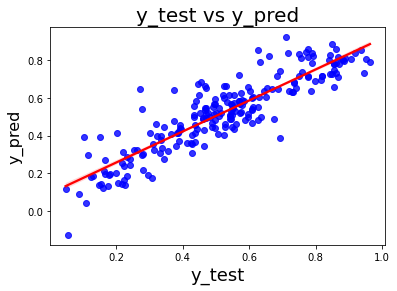

In [708]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparison between Training and Testing Dataset

* Train dataset R^2 = 0.837
* Train dataset Adjusted R^2 = 0.834
* Test dataset R^2 = 0.7958
* Test dataset Adjusted R^2 = 0.7839

#### Demand of bikes depend on year , holiday , temp , windspeed , summer , winter , Sep , Mon , Light_snow_rain , Mist